<a href="https://colab.research.google.com/github/MasahiroAraki/MLCourse/blob/master/answer/05a_generative-discriminative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第5章

## 課題

scikit-learn付属のwineデータ、breast-cancerデータに対して生成モデル・識別モデルそれぞれで識別を行い、問題の難しさと適したモデルとの関係を考察してください。ただし、元のデータを使うと正解率が高く、モデルの違いがわかりにくいので、主成分分析で2次元に変換したデータを対象に識別を行ってください。

## 準備

必要なライブラリ等を読み込みます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine, load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

## wineデータの識別

データの読み込み

In [2]:
wine = load_wine()
Xw = wine.data
yw = wine.target

## データの可視化

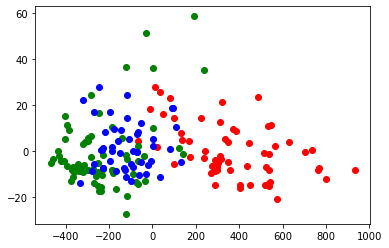

In [3]:
pca = PCA(n_components=2)
Xw2 = pca.fit_transform(Xw)
plt.plot(Xw2[yw==0,0], Xw2[yw==0,1],"ro")
plt.plot(Xw2[yw==1,0], Xw2[yw==1,1],"go")
plt.plot(Xw2[yw==2,0], Xw2[yw==2,1],"bo")

## ナイーブベイズ

交差確認法で性能を評価します。

In [4]:
clf1 = GaussianNB()
scores = cross_val_score(clf1, Xw2, yw, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.73 (+/- 0.17)


### ロジスティック識別

In [5]:
clf2 = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
scores = cross_val_score(clf2, Xw2, yw, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.69 (+/- 0.17)


## breast-cancerデータの識別

In [6]:
bc = load_breast_cancer()
Xb = bc.data
yb = bc.target

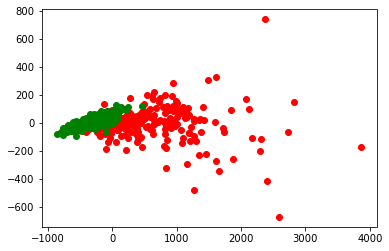

In [7]:
pca = PCA(n_components=2)
Xb2 = pca.fit_transform(Xb)
plt.plot(Xb2[yb==0,0], Xb2[yb==0,1],"ro")
plt.plot(Xb2[yb==1,0], Xb2[yb==1,1],"go")

In [8]:
clf1 = GaussianNB()
scores = cross_val_score(clf1, Xb2, yb, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.90 (+/- 0.06)


In [9]:
clf2 = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=1000)
scores = cross_val_score(clf2, Xb2, yb, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()*2))

Accuracy: 0.93 (+/- 0.06)


このデータではあまり差がでていませんが、クラスがあまりきれいに分離されていないデータでは、生成モデルであるGaussianNBよりも識別モデルであるLogisticRegressionのほうが一般に正解率が高くなる傾向があります。Wekaのglassデータなどで試してみてください。